#### Import packages


In [2]:
#All Imports are run in this block
#Run once every time you restart jupyter kernel
import pm4py
import pandas as pd

#### Read files


In [3]:
#Read itam_ocel.jsonl(json lines) file
#Read itam_ocel_xes file
ocel =pm4py.read_ocel_json('../global/itam_ocel.jsonl')
xes = pm4py.read_xes("itam.xes")

c:\lites\Python38\lib\site-packages\pm4py\util\dt_parsing\parser.py:82: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

#### Print read data


In [ ]:
print(ocel)
ocel.get_extended_table()
#View log data indexes
# print(xes)
# xes.head()

Object-Centric Event Log (number of events: 205, number of objects: 51, number of activities: 6, number of object types: 4, events-objects relationships: 497)
Activities occurrences: {'checkout': 68, 'accepted': 65, 'checkin from': 35, 'update': 26, 'create': 8, 'declined': 3}
Object types occurrences (number of objects): {'item_asset': 37, 'admin_user': 6, 'target_user': 6, 'item_accessory': 2}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


,ocel:eid,ocel:timestamp,ocel:activity,log_meta,action_date,action_source,filename,note,ocel:type:admin_user,ocel:type:item_asset,ocel:type:target_user,ocel:type:item_accessory
0,44378,2024-03-25 08:50:29+00:00,checkout,"{""location_id"":{""old"":1490,""new"":null}}",2024-03-25T08:50:29Z,gui,NaN,NaN,[A1],[L1],[C1],NaN
1,44379,2024-03-25 08:50:47+00:00,checkout,"{""location_id"":{""old"":1490,""new"":null}}",2024-03-25T08:50:47Z,gui,NaN,NaN,[A1],[P2],[C1],NaN
2,44380,2024-03-25 08:51:36+00:00,accepted,NaN,NaN,NaN,accepted-eula-2024-03-25-07-51-36.pdf,NaN,NaN,[P2],[C1],NaN
3,44381,2024-03-25 08:51:47+00:00,accepted,NaN,NaN,NaN,accepted-eula-2024-03-25-07-51-47.pdf,NaN,NaN,[L1],[C1],NaN
4,44382,2024-03-25 08:52:29+00:00,checkout,"{""location_id"":{""old"":1490,""new"":null}}",2024-03-25T08:52:29Z,gui,NaN,NaN,[A1],[M1],[C2],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
200,44578,2024-03-25 17:39:54+00:00,accepted,NaN,NaN,NaN,accepted-eula-2024-03-25-04-39-54.pdf,NaN,NaN,NaN,[C2],[Webcam USB]
201,44579,2024-03-25 17:40:15+00:00,accepted,NaN,NaN,NaN,accepted-eula-2024-03-25-04-40-14.pdf,NaN,NaN,NaN,[C1],[Headset USB]
202,44580,2024-03-25 17:40:19+00:00,accepted,NaN,NaN,NaN,accepted-eula-2024-03-25-04-40-18.pdf,NaN,NaN,[T1],[C1],NaN
203,44581,2024-03-25 17:41:19+00:00,checkin from,NaN,2024-03-25T17:41:19Z,gui,NaN,NaN,"[A1, C4]",NaN,NaN,[Webcam USB]


#### Directly Follows Graph


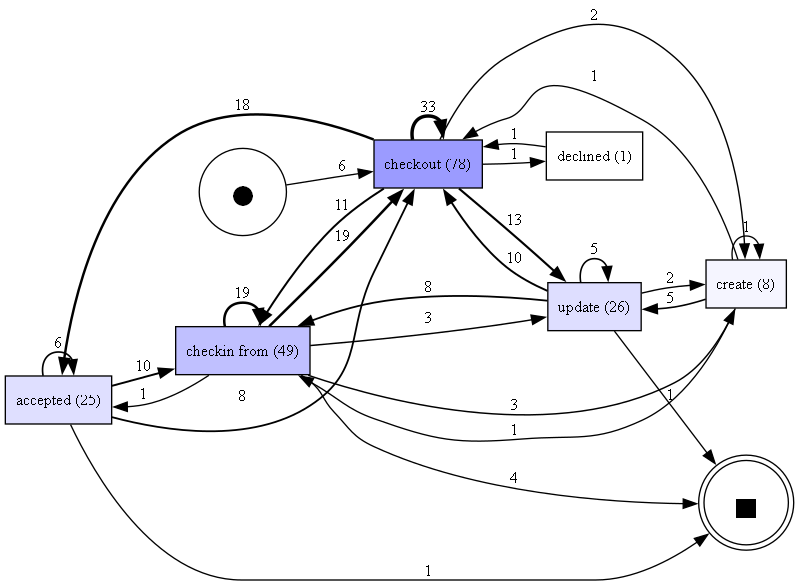

In [8]:
dfg, start_activities, end_activities = pm4py.discover_dfg(xes, 
                                                           case_id_key='case:concept:name',
                                                           activity_key='concept:name',
                                                           timestamp_key='time:timestamp'
                                                           )
pm4py.vis.view_dfg(dfg, start_activities, end_activities)

#### BPMN


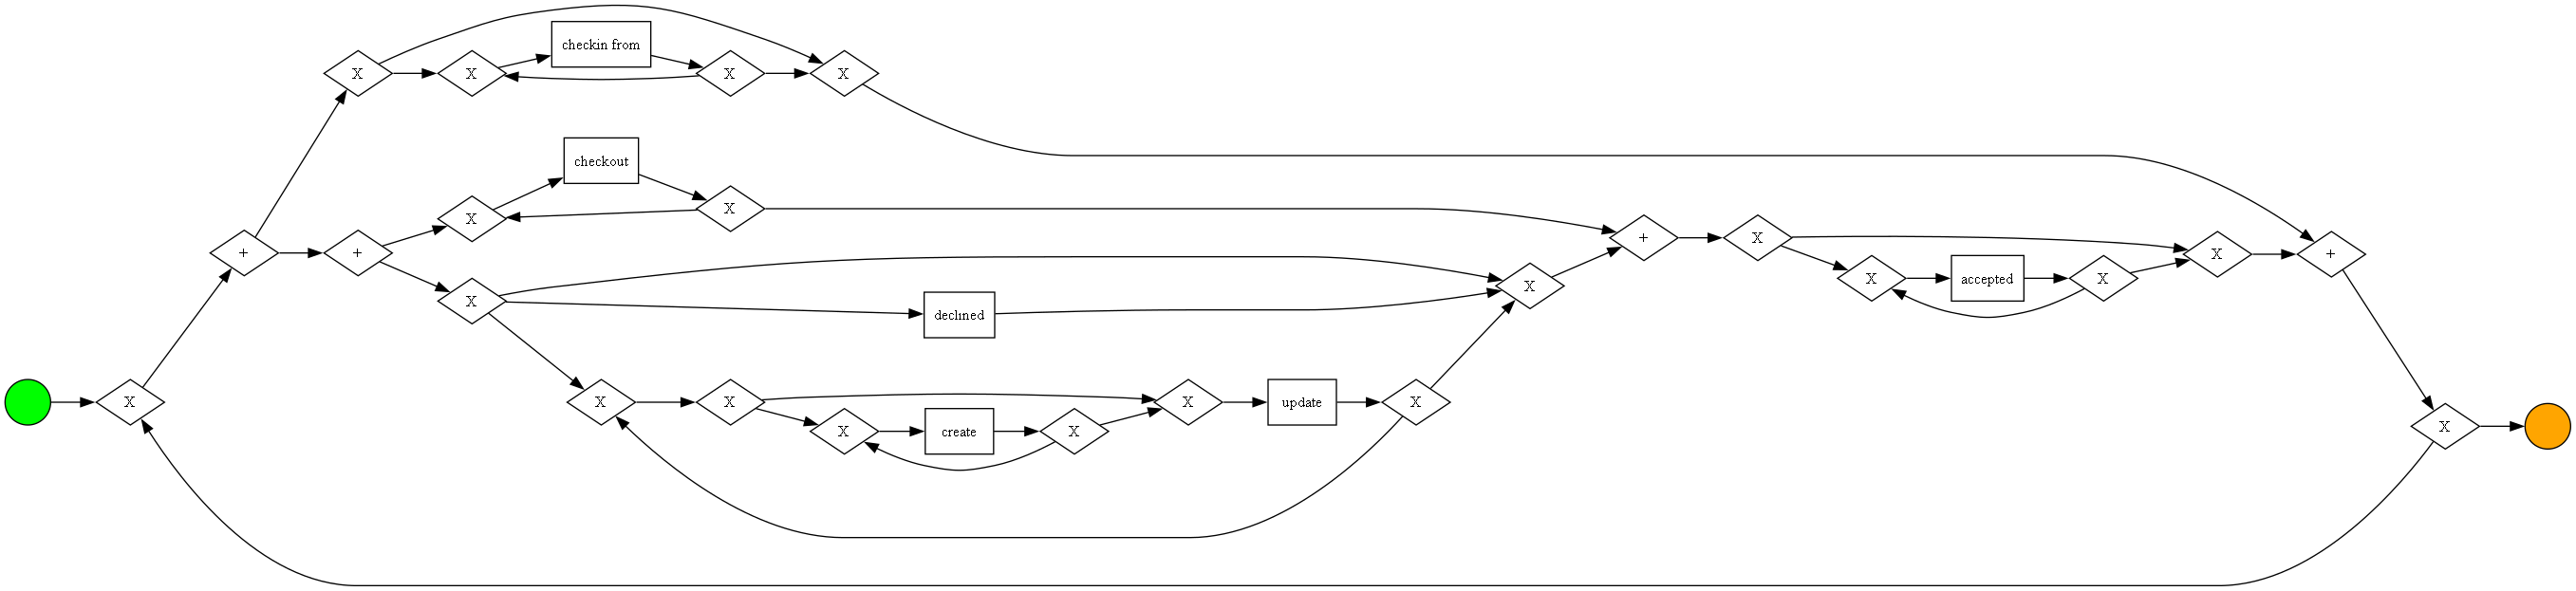

In [9]:
bpmn = pm4py.discover_bpmn_inductive(xes)
pm4py.vis.view_bpmn(bpmn)

#### Heuristics Net


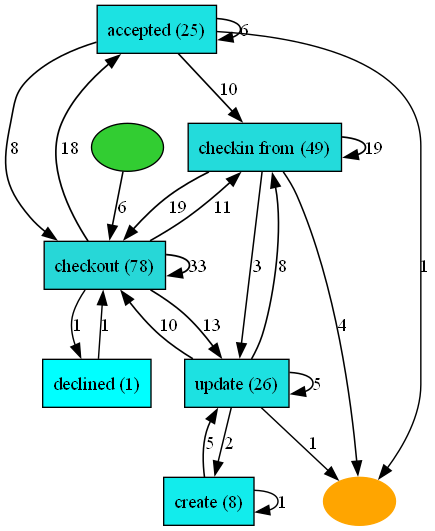

In [10]:
heuristics_net = pm4py.discover_heuristics_net(xes)
pm4py.vis.view_heuristics_net(heuristics_net)

#### Object Centric Directly Follows Graph (OCDFG)


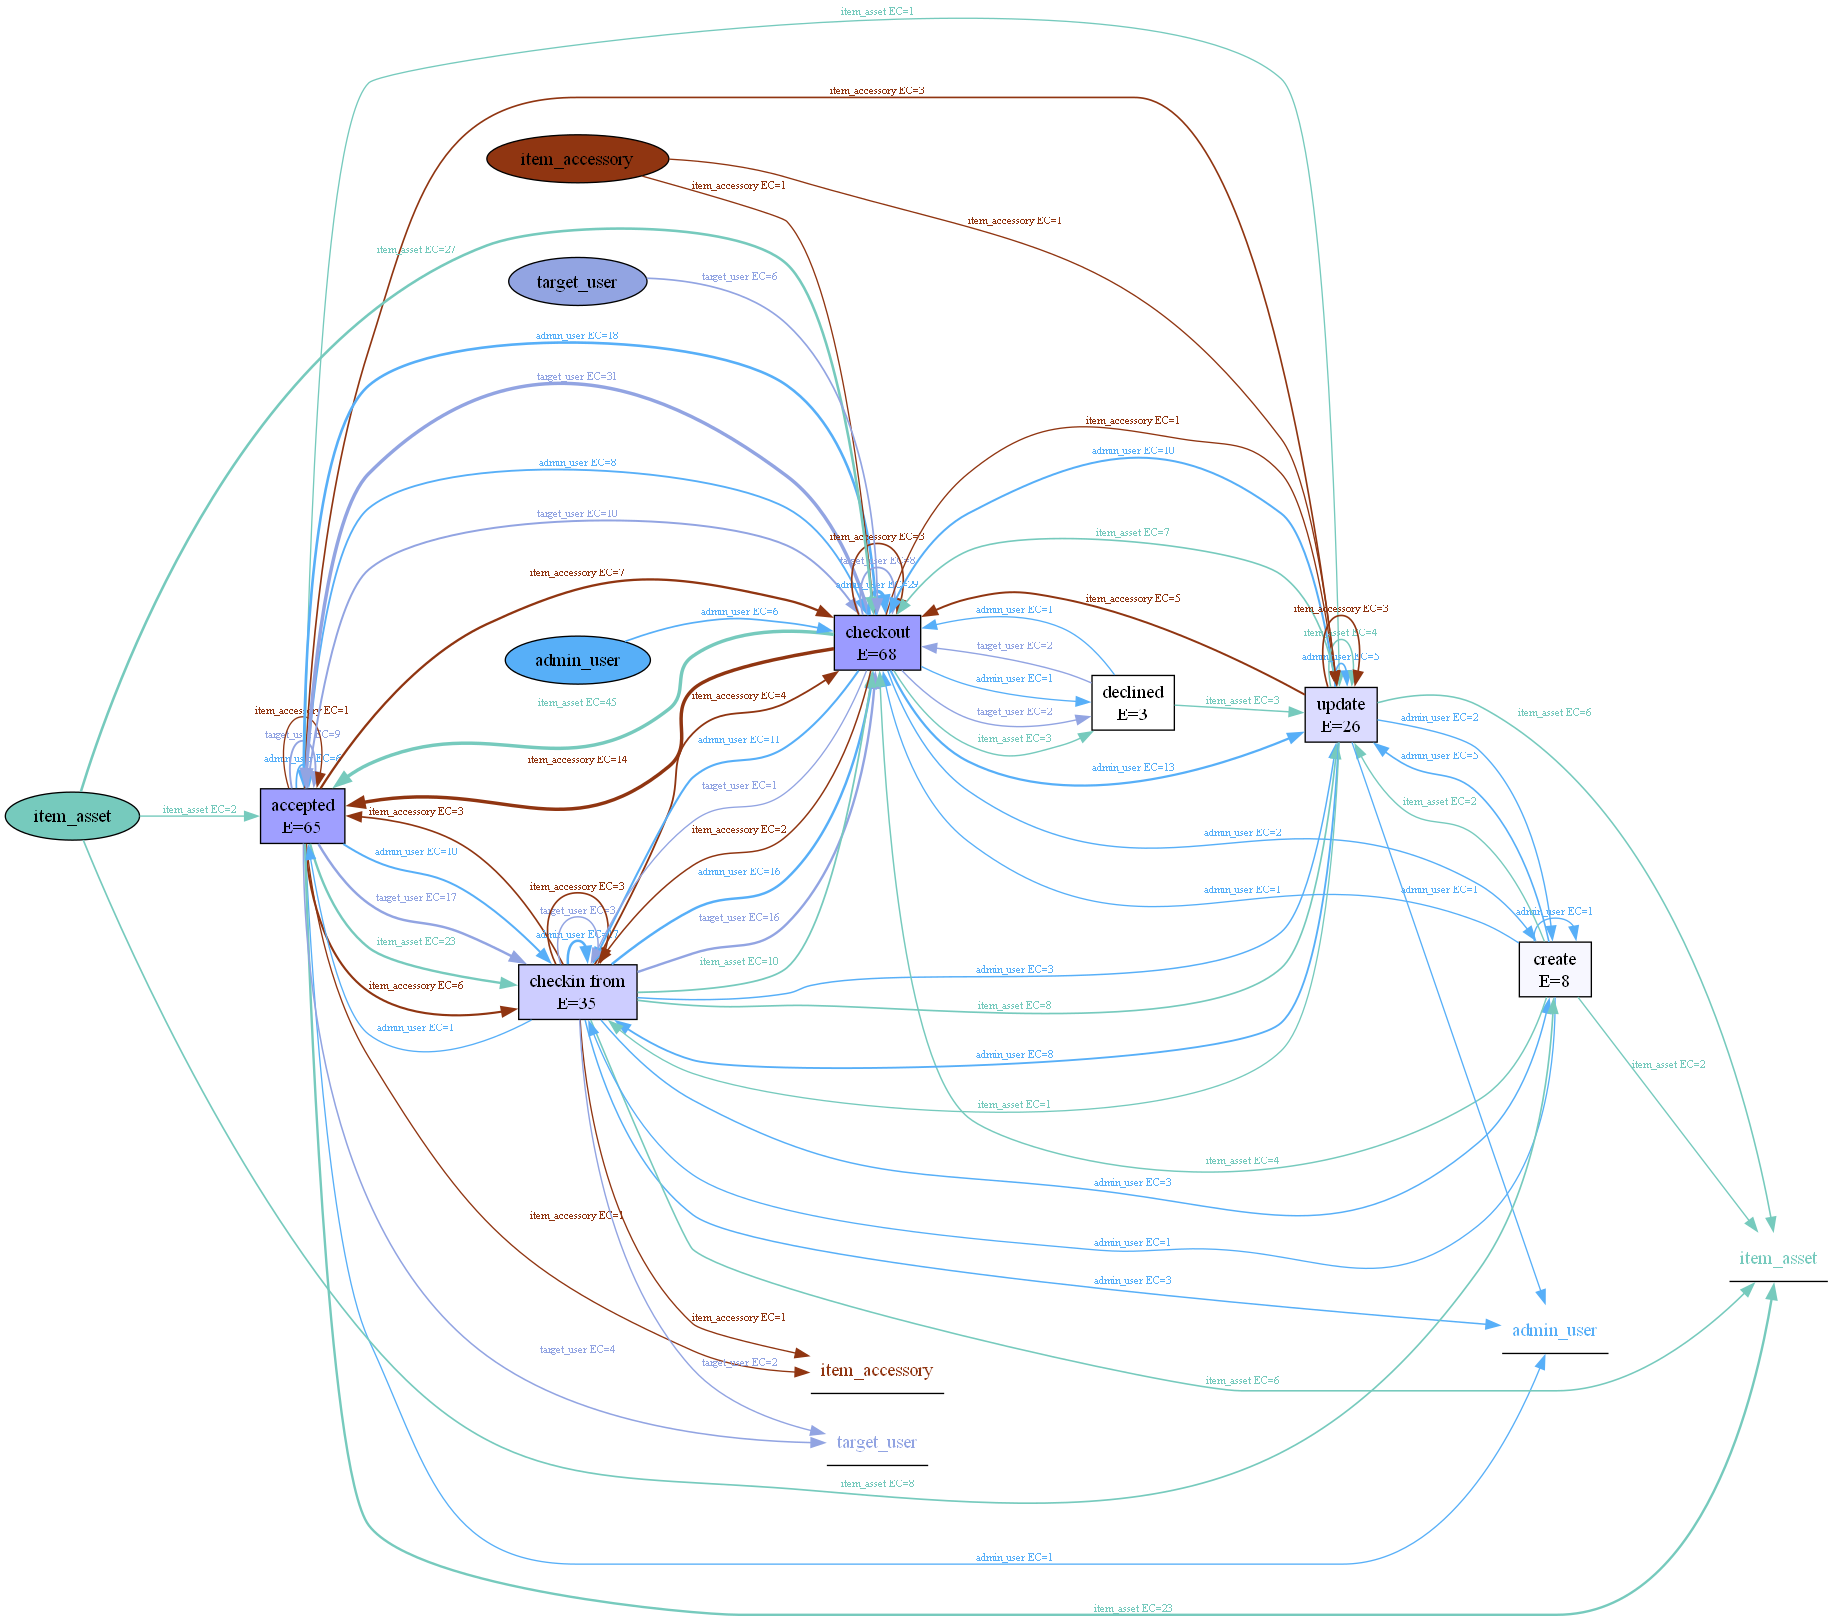

In [11]:
ocel_viz = pm4py.discover_ocdfg(ocel)
pm4py.vis.view_ocdfg(ocel_viz)

#### Process Variations


In [12]:
count = 1
for variant, subdf in pm4py.split_by_process_variant(xes):
    print(f"Variante: {count}")
    print(variant)
    count += 1;

Variante: 1
('checkout', 'checkout', 'checkout', 'checkout', 'checkout', 'create', 'update', 'create', 'update', 'checkin from', 'checkout', 'checkout', 'update', 'checkin from', 'update', 'create', 'checkin from', 'checkin from', 'update', 'update', 'checkin from', 'checkin from', 'checkout', 'checkout', 'update', 'checkout', 'update', 'update', 'checkin from', 'checkout', 'update', 'checkout', 'update', 'update', 'update', 'checkin from', 'checkin from', 'checkout', 'update', 'checkin from', 'checkout', 'update', 'checkout', 'checkout', 'checkout', 'checkout', 'checkin from', 'create', 'update', 'checkout', 'checkout', 'checkin from', 'checkin from', 'checkin from', 'checkin from', 'checkout', 'checkin from', 'checkin from', 'update', 'checkout', 'checkout', 'checkout', 'checkout', 'checkin from', 'checkin from', 'checkin from', 'checkin from', 'checkin from', 'checkout', 'checkout', 'checkout', 'checkin from', 'checkout', 'checkout', 'checkin from', 'checkin from', 'checkin from', '

In [13]:
print(f"Anzahl der Variante: {count - 1}")

Anzahl der Variante: 6
